 База по статистике

2 этап. Аналитика и матстат.
- Теорвер/ матстат. (Понимание основных понятий теории вероятностей и математической статистики: случайная величина, функция распределения, независимость событий, условная вероятность, ЦПТ, матожидание, дисперсия, мода, статистические критерии и их применимость, ошибки первого и второго рода, уровень значимости, p-value, статистическая мощность, AB тесты.)

- Аналитика. (Необходимо генерировать гипотезы и подвергать их сомнению, уметь продумывать иерархию метрик продукта, понимать, чем предложенные метрики хороши/плохи, как организовать АБ тесты для продукта (оценить размер выборки для эксперимента, понять значимое ли произошло изменение метрики и т.д.))
(1 час)

 Теория вероятностей и математическая статистика


случайня величина
функция распределения
независимость событий
условная вероятность 
ЦПТ
матожидание, дисперсия, мода
ошибка первого рода, ошибка второго рода
уровень значимости
p-value


## 1. Случайная величина

**Определение:**

Случайная величина $X$ — это числовая величина, значение которой определяется исходом случайного эксперимента.

Различают два вида случайных величин:

- **Дискретные** — принимают отдельные значения (например, бросок кубика)
- **Непрерывные** — принимают любое значение из промежутка (например, рост человека)

**Пример:**

Бросаем кубик. Пусть $X$ — число выпавших очков. Тогда:

$X \in \{1, 2, 3, 4, 5, 6\}$

Это дискретная случайная величина.


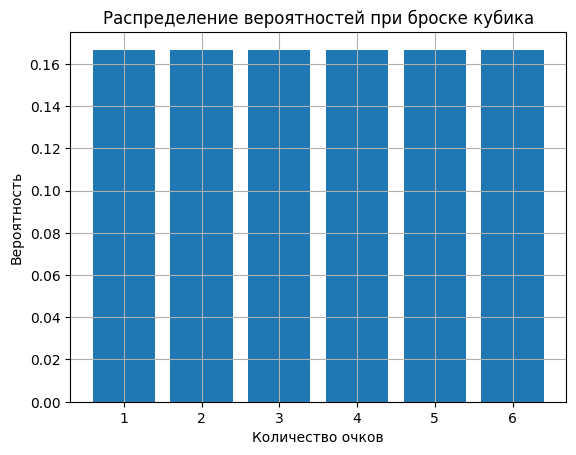

In [4]:
import matplotlib.pyplot as plt

dice_outcomes = [1, 2, 3, 4, 5, 6]
probabilities = [1/6] * 6

plt.bar(dice_outcomes, probabilities)
plt.xlabel('Количество очков')
plt.ylabel('Вероятность')
plt.title('Распределение вероятностей при броске кубика')
plt.grid()
plt.show()


## 2. Функция распределения

**Определение:**

Функция распределения $F(x)$ — это вероятность того, что случайная величина примет значение меньшее или равное $x$:

$$
F(x) = P(X \leq x)
$$

**Свойства:**
- $0 \leq F(x) \leq 1$
- $F(x)$ не убывает
- $\lim_{x \to -\infty} F(x) = 0$, $\lim_{x \to +\infty} F(x) = 1$

**Пример:**

Пусть $X \sim U[0, 1]$. Тогда:

$$
F(x) =
\begin{cases}
0, & x < 0 \\
x, & 0 \leq x \leq 1 \\
1, & x > 1
\end{cases}
$$


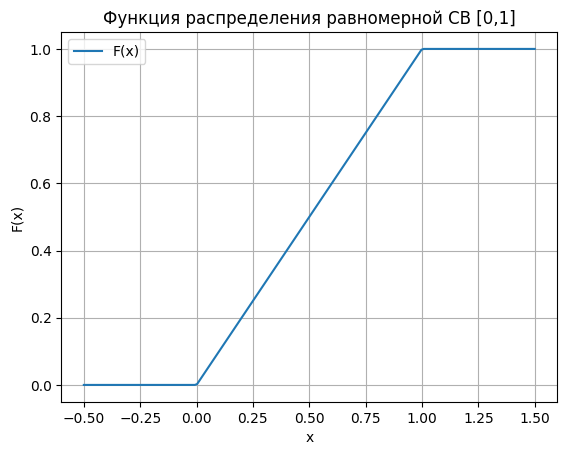

In [5]:
import numpy as np

x = np.linspace(-0.5, 1.5, 200)
F = np.piecewise(x, [x < 0, (x >= 0) & (x <= 1), x > 1], [0, lambda x: x, 1])

plt.plot(x, F, label='F(x)')
plt.xlabel('x')
plt.ylabel('F(x)')
plt.title('Функция распределения равномерной СВ [0,1]')
plt.grid()
plt.legend()
plt.show()


Пусть $X$ — доход человека. Тогда $F(50,000)$ — вероятность того, что человек зарабатывает не более 50 тыс.

Чтобы **рассчитать вероятность $F(50\,000) = P(X \leq 50\,000)$**, нам нужно знать, **распределение случайной величины $X$**, то есть:

- Каким законом распределён доход (например, нормальное, логнормальное, равномерное и т.д.)
- Какие параметры у этого распределения (среднее, стандартное отклонение и др.)

Допустим:

- $X \sim \mathcal{N}(\mu = 60\,000,\ \sigma = 10\,000)$  
  (средний доход — 60 тыс., стандартное отклонение — 10 тыс.)

Тогда:

$$
F(50\,000) = P(X \leq 50\,000) = \Phi\left(\frac{50\,000 - 60\,000}{10\,000}\right) = \Phi(-1) \approx 0.1587
$$

То есть, **около 15.87%** людей зарабатывают **не более 50 тыс.**

In [7]:
from scipy.stats import norm

mu = 60000      # средний доход
sigma = 10000   # стандартное отклонение

x = 50000
prob = norm.cdf(x, loc=mu, scale=sigma)

print(f"P(X <= 50,000) = {prob:.4f} → {prob*100:.2f}% людей зарабатывают не более 50 тыс.")

P(X <= 50,000) = 0.1587 → 15.87% людей зарабатывают не более 50 тыс.


## 3. Независимость событий

**Определение:**

События $A$ и $B$ независимы, если:

$$
P(A \cap B) = P(A) \cdot P(B)
$$

**Пример:**

Бросаем монету дважды:  
- $A$: орёл в 1-м броске  
- $B$: орёл во 2-м броске  

Поскольку $P(A) = P(B) = \frac{1}{2}$, а $P(A \cap B) = \frac{1}{4}$, то:

$$
P(A) \cdot P(B) = \frac{1}{4} = P(A \cap B)
$$

Значит, события независимы.

---

Пример **зависимых событий**:

Пример: Вытягивание карт из колоды без возврата

**Ситуация:**
Из стандартной колоды (52 карты) подряд вытягиваются две карты **без возврата**.

Обозначим:

- Событие $A$: первая карта — туз  
- Событие $B$: вторая карта — туз

- Вероятность $A$ (первая карта — туз):  
  $P(A) = \frac{4}{52} = \frac{1}{13}$

- Если **первая карта уже оказалась тузом**, то во всей колоде осталось только **3 туза из 51 карты**, то есть:  
  $P(B|A) = \frac{3}{51}$

- Но если бы $A$ и $B$ были **независимы**, то:  
  $P(B|A)$ должно было бы быть равно просто $P(B) = \frac{4}{52}$

Поскольку:
$$
P(B|A) = \frac{3}{51} \ne P(B) = \frac{4}{52},
$$
→ события **зависимы**:  
**вероятность $B$ изменилась после наступления события $A$**

## 4. Условная вероятность

**Определение:**

$$
P(A|B) = \frac{P(A \cap B)}{P(B)} = P(A)_{событиянезависимы} = \frac{P(A) \cdot P(B|A)}{P(B)}_{событиязависимы}, \quad P(B) > 0
$$

**Пример:**

В корзине 3 красных и 2 зелёных яблока. Выбираем 2 яблока подряд без возврата.  
Какова вероятность, что второе яблоко — зелёное, если первое — красное?

Мы знаем что первое яблоко красное - значит красное B, мы не знаем, какое второе яблоко поэтому оно A

- $P(B) = \frac{3}{5}$ 
- $P(A \cap B) = \frac{3}{5} \cdot \frac{2}{4} = \frac{3}{10}$
- Тогда:

$$
P(A|B) = \frac{3/10}{3/5} = \frac{1}{2}
$$


In [6]:
P_B = 3/5
P_A_and_B = (3/5)*(2/4)
P_A_given_B = P_A_and_B / P_B

print(f"Условная вероятность второго зелёного при первом красном: {P_A_given_B:.2f}")


Условная вероятность второго зелёного при первом красном: 0.50


 Стат критерии / AB тесты (оценка размера выборки / значимость изменения)

 Линеаризация

 Стратификация

 CUPED

 Дельта метод

 Иерархия метрик / древо 